In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inlinṣe
import seaborn as sns

In [2]:
#Import dataset
intern=pd.read_csv('train.csv')
intern.head()

,id,protected,Title,Company,Location,Duration,Stipend_per_month,Apply By,Applicants,Skills Required,Perks,Number of Openings,Incentives,Category
0,1,54622,Accounts,Cytomol Labs,Secunderabad,6.0,8000,31 Jan' 22,33 applicants,"Accounting , Tally ,",NaN,1,0,Commerce
1,2,27305950,Graphic Design,Varistor Solar,Ajmer,6.0,6000,5 Feb' 22,Be an early applicant,"Adobe Photoshop ,","Certificate , Letter of recommendation , Flexi...",2,0,Graphic Design
2,3,22681506,Graphic Design,Rugas Technologies Private Limited,Work From Home,2.0,15000,10 Feb' 22,48 applicants,"Adobe Photoshop , Adobe XD , CSS , Figma , HTM...","Certificate , Flexible work hours ,",1,0,Graphic Design
3,4,57706912,Marketing,Glamanand Entertainment,Work From Home,4.0,5000,7 Feb' 22,53 applicants,"English Proficiency (Spoken) , English Profici...","Certificate , Letter of recommendation , Flexi...",6,0,Marketing
4,5,43990,Accounts,SocialWell,Bhubaneswar,6.0,6000,3 Feb' 22,Be an early applicant,"Accounting ,","Certificate , Informal dress code ,",1,0,Commerce


In [3]:
#Drop the column 'Protected'
intern.drop(columns=['protected'],inplace=True)

In [4]:
#To check whether there are duplicate records in the dataset
duplicate=intern[intern.duplicated()] 
duplicate

,id,Title,Company,Location,Duration,Stipend_per_month,Apply By,Applicants,Skills Required,Perks,Number of Openings,Incentives,Category


There are no duplicate records in our dataset

In [5]:
#Check the data types of each attribute.
intern.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  8518 non-null   int64  
 1   Title               8518 non-null   object 
 2   Company             8518 non-null   object 
 3   Location            8518 non-null   object 
 4   Duration            8518 non-null   float64
 5   Stipend_per_month   8518 non-null   object 
 6   Apply By            8518 non-null   object 
 7   Applicants          8518 non-null   object 
 8   Skills Required     6412 non-null   object 
 9   Perks               8104 non-null   object 
 10  Number of Openings  8518 non-null   int64  
 11  Incentives          8518 non-null   int64  
 12  Category            8518 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 865.2+ KB


#### There are 3 attributes of integer datatype, 9 attributes of object datatype and 1 attribute of float datatype<br>The datatype of Stipend_per_month should be float and not object and the datatype of Applicants column must be int so that analysis would be easier.<br>So, we will check if there are any wrong entries in Stipend_per_month column as well as other columns

In [6]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in intern.columns:
    print('{} : {}'.format(col,intern[col].unique()))

id : [   1    2    3 ... 8516 8517 8518]
Title : ['Accounts' 'Graphic Design' 'Marketing' ... 'Illustration Design'
 'Unity 3D' 'Business Development (Seasonings For Snacks Industry)']
Company : ['Cytomol Labs' 'Varistor Solar' 'Rugas Technologies Private Limited' ...
 'Seema Analytica Private Limited' 'WWF-India' 'CelebratingLife Infotech']
Location : ['Secunderabad' 'Ajmer' 'Work From Home' 'Bhubaneswar' 'Bangalore'
 'Kolkata' 'Noida' 'Delhi' 'Chandigarh' 'Hyderabad' 'Mumbai' 'Gurgaon'
 'Nagpur' 'Vijayapura' 'Faridabad' 'Guwahati' 'Ghaziabad' 'Navi Mumbai'
 'Pune' 'Lucknow' 'Thane' 'Surat' 'Ahmedabad' 'Visakhapatnam' 'Chennai'
 'Nashik' 'Karimnagar' 'Bhopal' 'Jaipur' 'Udaipur' 'Mohali' 'Jabalpur'
 'Mysuru' 'Zirakpur' 'Coimbatore' 'Gwalior' 'Agra' 'Akola' 'Raipur'
 'Indore' 'Gorakhpur' 'Hooghly' 'Asansol' 'Ulhasnagar' 'Amritsar'
 'Jodhpur' 'Bareilly' 'Sonipat' 'Warangal' 'Ambala' 'Kolhapur' 'Virar'
 'Dehradun' 'Vadodara' 'Patiala' 'Panjim' 'Erode' 'Pallavaram' 'Angul'
 'Rajkot' 'Muzaf

#### Stipend_per_month column has wrong entries like 'Unknown'. <br>Perks column has similar values separated by a delimiter (here comma). So, later we will split the column 'Perks' into  multiple columns like 'Certificate', 'LOR', 'Flexible_work_hrs', 'Job_Offer', 'Informal_Dress_Code','5_Days','Free_Snacks'<br>Skills columns also has multiple columns separated by comma<br>Applicants column has a number in it alongwith the word 'applicant' for most rows except certain rows where it is 'Be an early applicant'.<br>Location column has 'Work From Home' and other cities names. We can make a new column to denote WFH for our analysis.<br> 

In [7]:
#Replacing 'Unknown' values in Stipend_per_month column with NaN
intern['Stipend_per_month'].replace({'Unknown':np.nan},inplace=True)
intern.head()

,id,Title,Company,Location,Duration,Stipend_per_month,Apply By,Applicants,Skills Required,Perks,Number of Openings,Incentives,Category
0,1,Accounts,Cytomol Labs,Secunderabad,6.0,8000,31 Jan' 22,33 applicants,"Accounting , Tally ,",NaN,1,0,Commerce
1,2,Graphic Design,Varistor Solar,Ajmer,6.0,6000,5 Feb' 22,Be an early applicant,"Adobe Photoshop ,","Certificate , Letter of recommendation , Flexi...",2,0,Graphic Design
2,3,Graphic Design,Rugas Technologies Private Limited,Work From Home,2.0,15000,10 Feb' 22,48 applicants,"Adobe Photoshop , Adobe XD , CSS , Figma , HTM...","Certificate , Flexible work hours ,",1,0,Graphic Design
3,4,Marketing,Glamanand Entertainment,Work From Home,4.0,5000,7 Feb' 22,53 applicants,"English Proficiency (Spoken) , English Profici...","Certificate , Letter of recommendation , Flexi...",6,0,Marketing
4,5,Accounts,SocialWell,Bhubaneswar,6.0,6000,3 Feb' 22,Be an early applicant,"Accounting ,","Certificate , Informal dress code ,",1,0,Commerce


In [8]:
#Finding missing values in each column
intern.isnull().sum()

id                       0
Title                    0
Company                  0
Location                 0
Duration                 0
Stipend_per_month       58
Apply By                 0
Applicants               0
Skills Required       2106
Perks                  414
Number of Openings       0
Incentives               0
Category                 0
dtype: int64

Using heatmap, we can visualize the amount of data that is missing from the attribute. This will heps us decide whether to drop the missing values or replace them

<AxesSubplot:>

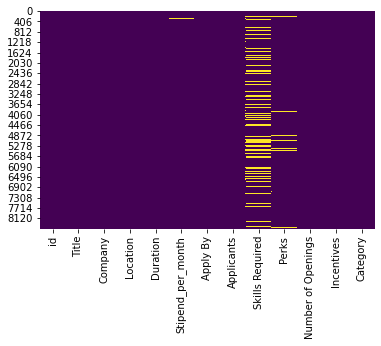

In [9]:
#Visualizing missing values
sns.heatmap(intern.isnull(),cbar=False,cmap='viridis')

There are many missing values in 'Skills Required' Attribute. Hence, we need to replace them. While missing values in Skills Required and Perks attributes are replaced with 'None'


In [10]:
#Replacing missing values in 'Skills Required' column with 'None' 
intern['Skills Required'] = intern['Skills Required'].fillna('None')

In [11]:
#Replacing missing values in 'Perks' column with 'None'
intern['Perks'] = intern['Perks'].fillna('None')

In [12]:
#Dropping missing values in 'Stipend_per_month' column
intern.dropna(subset=['Stipend_per_month'], inplace=True)

In [13]:
#Checking if all the missing values are dealt with
intern.isnull().sum()

id                    0
Title                 0
Company               0
Location              0
Duration              0
Stipend_per_month     0
Apply By              0
Applicants            0
Skills Required       0
Perks                 0
Number of Openings    0
Incentives            0
Category              0
dtype: int64

In [14]:
#Changing datatype of Stipend_per_month
intern['Stipend_per_month'] = intern['Stipend_per_month'].astype('float64')

In [15]:
#Splitting the 'Perks' column into multiple columns like 'Certificate', 'LOR', 'Flexible_work_hrs', 
#'Job_Offer', 'Informal_Dress_Code','5_Days','Free_Snacks'

intern['Certificate'] = intern['Perks'].apply(lambda x:1 if 'Certificate' in x else 0)
intern['LOR'] = intern['Perks'].apply(lambda x:1 if 'Letter of recommendation' in x else 0)
intern['Flexible_work_hrs'] = intern['Perks'].apply(lambda x:1 if 'Flexible work hours' in x else 0)
intern['Job_Offer'] = intern['Perks'].apply(lambda x:1 if 'Job offer' in x else 0)
intern['Informal_Dress_Code'] = intern['Perks'].apply(lambda x:1 if 'Informal dress code' in x else 0)
intern['5_Days'] = intern['Perks'].apply(lambda x:1 if '5 days a week' in x else 0)
intern['Free_Snacks'] = intern['Perks'].apply(lambda x:1 if 'Free snacks & beverages' in x else 0)

#Drop column 'Perks'
intern.drop(columns=['Perks'],inplace=True)

intern.head()

,id,Title,Company,Location,Duration,Stipend_per_month,Apply By,Applicants,Skills Required,Number of Openings,Incentives,Category,Certificate,LOR,Flexible_work_hrs,Job_Offer,Informal_Dress_Code,5_Days,Free_Snacks
0,1,Accounts,Cytomol Labs,Secunderabad,6.0,8000.0,31 Jan' 22,33 applicants,"Accounting , Tally ,",1,0,Commerce,0,0,0,0,0,0,0
1,2,Graphic Design,Varistor Solar,Ajmer,6.0,6000.0,5 Feb' 22,Be an early applicant,"Adobe Photoshop ,",2,0,Graphic Design,1,1,1,0,1,1,1
2,3,Graphic Design,Rugas Technologies Private Limited,Work From Home,2.0,15000.0,10 Feb' 22,48 applicants,"Adobe Photoshop , Adobe XD , CSS , Figma , HTM...",1,0,Graphic Design,1,0,1,0,0,0,0
3,4,Marketing,Glamanand Entertainment,Work From Home,4.0,5000.0,7 Feb' 22,53 applicants,"English Proficiency (Spoken) , English Profici...",6,0,Marketing,1,1,1,1,0,1,0
4,5,Accounts,SocialWell,Bhubaneswar,6.0,6000.0,3 Feb' 22,Be an early applicant,"Accounting ,",1,0,Commerce,1,0,0,0,1,0,0


As you can observe, there are Multiple skills mentioned in the 'Skills Required' Column separated by a delimiter(comma). Hence we will make a new column 'No of skills'.

In [16]:
# Making a new column 'No of Skills'
intern['No of Skills'] = intern['Skills Required'].apply(lambda i: (len(i.split(','))-1))
intern[['Skills Required', 'No of Skills']]

,Skills Required,No of Skills
0,"Accounting , Tally ,",2
1,"Adobe Photoshop ,",1
2,"Adobe Photoshop , Adobe XD , CSS , Figma , HTM...",6
3,"English Proficiency (Spoken) , English Profici...",2
4,"Accounting ,",1
...,...,...
8513,"Client Relationship , English Proficiency (Spo...",3
8514,"Adobe Illustrator , Adobe Photoshop , Adobe Ph...",4
8515,None,0
8516,"Unity 3D , Unreal Engine ,",2


In [17]:
#Changing 'Be an early applicant' in 'Applicants' column to '0 applicants'
intern['Applicants']= intern['Applicants'].str.replace("Be an early applicant", "0 applicants")

In [18]:
#Extracting only the number in 'Applicants' column
intern['Applicants']= intern['Applicants'].str.replace(r'\D', '')
intern['Applicants']= intern['Applicants'].astype('int64')
intern.head(295)

,id,Title,Company,Location,Duration,Stipend_per_month,Apply By,Applicants,Skills Required,Number of Openings,Incentives,Category,Certificate,LOR,Flexible_work_hrs,Job_Offer,Informal_Dress_Code,5_Days,Free_Snacks,No of Skills
0,1,Accounts,Cytomol Labs,Secunderabad,6.0,8000.0,31 Jan' 22,33,"Accounting , Tally ,",1,0,Commerce,0,0,0,0,0,0,0,2
1,2,Graphic Design,Varistor Solar,Ajmer,6.0,6000.0,5 Feb' 22,0,"Adobe Photoshop ,",2,0,Graphic Design,1,1,1,0,1,1,1,1
2,3,Graphic Design,Rugas Technologies Private Limited,Work From Home,2.0,15000.0,10 Feb' 22,48,"Adobe Photoshop , Adobe XD , CSS , Figma , HTM...",1,0,Graphic Design,1,0,1,0,0,0,0,6
3,4,Marketing,Glamanand Entertainment,Work From Home,4.0,5000.0,7 Feb' 22,53,"English Proficiency (Spoken) , English Profici...",6,0,Marketing,1,1,1,1,0,1,0,2
4,5,Accounts,SocialWell,Bhubaneswar,6.0,6000.0,3 Feb' 22,0,"Accounting ,",1,0,Commerce,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,292,Graphic Design,Internship Studio,Pune,6.0,7000.0,1 Feb' 22,38,"3ds Max , Adobe Illustrator , Adobe Photoshop ...",1,0,Graphic Design,1,1,0,0,0,0,0,4
292,293,Social Media Marketing,The Girlfriend Box (TGB),Mumbai,3.0,10000.0,4 Feb' 22,39,None,3,0,Marketing,1,1,0,0,1,0,0,0
293,294,Software Engineering,Telestream India Private Limited,Work From Home,5.0,35000.0,2 Feb' 22,1000,"C++ Programming , C Programming , Java ,",2,0,Computer Science,0,0,0,0,0,1,0,3
294,295,Graphic Design,Fitspire,Delhi,3.0,6000.0,12 Feb' 22,0,"Adobe After Effects , Adobe Illustrator , Adob...",2,0,Graphic Design,1,1,0,0,0,0,0,8


In [19]:
#Making a new column 'wfh'
intern['WFH'] = intern['Location'].apply(lambda x:1 if 'Work From Home' in x else 0)
intern.head(5)

,id,Title,Company,Location,Duration,Stipend_per_month,Apply By,Applicants,Skills Required,Number of Openings,...,Category,Certificate,LOR,Flexible_work_hrs,Job_Offer,Informal_Dress_Code,5_Days,Free_Snacks,No of Skills,WFH
0,1,Accounts,Cytomol Labs,Secunderabad,6.0,8000.0,31 Jan' 22,33,"Accounting , Tally ,",1,...,Commerce,0,0,0,0,0,0,0,2,0
1,2,Graphic Design,Varistor Solar,Ajmer,6.0,6000.0,5 Feb' 22,0,"Adobe Photoshop ,",2,...,Graphic Design,1,1,1,0,1,1,1,1,0
2,3,Graphic Design,Rugas Technologies Private Limited,Work From Home,2.0,15000.0,10 Feb' 22,48,"Adobe Photoshop , Adobe XD , CSS , Figma , HTM...",1,...,Graphic Design,1,0,1,0,0,0,0,6,1
3,4,Marketing,Glamanand Entertainment,Work From Home,4.0,5000.0,7 Feb' 22,53,"English Proficiency (Spoken) , English Profici...",6,...,Marketing,1,1,1,1,0,1,0,2,1
4,5,Accounts,SocialWell,Bhubaneswar,6.0,6000.0,3 Feb' 22,0,"Accounting ,",1,...,Commerce,1,0,0,0,1,0,0,1,0


In [20]:
intern.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8460 entries, 0 to 8517
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   8460 non-null   int64  
 1   Title                8460 non-null   object 
 2   Company              8460 non-null   object 
 3   Location             8460 non-null   object 
 4   Duration             8460 non-null   float64
 5   Stipend_per_month    8460 non-null   float64
 6   Apply By             8460 non-null   object 
 7   Applicants           8460 non-null   int64  
 8   Skills Required      8460 non-null   object 
 9   Number of Openings   8460 non-null   int64  
 10  Incentives           8460 non-null   int64  
 11  Category             8460 non-null   object 
 12  Certificate          8460 non-null   int64  
 13  LOR                  8460 non-null   int64  
 14  Flexible_work_hrs    8460 non-null   int64  
 15  Job_Offer            8460 non-null   i

There are 13 attributes of integer datatype, 6 attributes of object datatype and 2 attributes of float datatype

In [21]:
intern.describe().T

,count,mean,std,min,25%,50%,75%,max
id,8460.0,4258.545154,2459.057789,1.00,2128.75,4257.5,6389.25,8518.0
Duration,8460.0,3.621129,1.946844,0.25,2.00,3.0,6.00,36.0
Stipend_per_month,8460.0,6124.351458,4863.532788,0.00,3000.00,5000.0,8000.00,50000.0
Applicants,8460.0,45.072459,88.404743,0.00,0.00,0.0,57.00,1000.0
Number of Openings,8460.0,5.613948,71.665434,1.00,1.00,2.0,5.00,5000.0
Incentives,8460.0,0.095626,0.294096,0.00,0.00,0.0,0.00,1.0
Certificate,8460.0,0.875414,0.330269,0.00,1.00,1.0,1.00,1.0
LOR,8460.0,0.709220,0.454149,0.00,0.00,1.0,1.00,1.0
Flexible_work_hrs,8460.0,0.564539,0.495847,0.00,0.00,1.0,1.00,1.0
Job_Offer,8460.0,0.195745,0.396796,0.00,0.00,0.0,0.00,1.0


#### The dataset has been cleaned successfully and hence can be used for analysis

## Analysis

In [22]:
# Correlation matrix

corr = intern.corr()
corr.style.background_gradient(cmap='Purples').set_precision(3)

,id,Duration,Stipend_per_month,Applicants,Number of Openings,Incentives,Certificate,LOR,Flexible_work_hrs,Job_Offer,Informal_Dress_Code,5_Days,Free_Snacks,No of Skills,WFH
id,1.000,-0.011,-0.009,-0.005,0.001,-0.002,-0.005,0.007,0.000,-0.010,0.006,-0.005,0.019,-0.002,0.003
Duration,-0.011,1.000,0.245,-0.086,-0.039,-0.062,-0.096,-0.058,-0.194,0.099,0.083,-0.055,0.050,0.054,-0.211
Stipend_per_month,-0.009,0.245,1.000,0.174,-0.036,-0.128,-0.162,-0.127,-0.229,0.169,0.145,0.017,0.126,0.030,-0.276
Applicants,-0.005,-0.086,0.174,1.000,0.180,-0.068,-0.009,-0.021,0.068,-0.008,-0.163,0.036,-0.112,-0.050,0.280
Number of Openings,0.001,-0.039,-0.036,0.180,1.000,-0.001,0.013,-0.010,-0.015,-0.014,-0.017,0.001,-0.010,-0.031,0.026
Incentives,-0.002,-0.062,-0.128,-0.068,-0.001,1.000,0.006,0.038,0.073,0.022,-0.017,0.030,-0.021,-0.019,0.050
Certificate,-0.005,-0.096,-0.162,-0.009,0.013,0.006,1.000,0.372,0.175,0.065,0.103,0.102,0.065,0.058,0.070
LOR,0.007,-0.058,-0.127,-0.021,-0.010,0.038,0.372,1.000,0.245,0.094,0.109,0.103,0.089,0.082,0.082
Flexible_work_hrs,0.000,-0.194,-0.229,0.068,-0.015,0.073,0.175,0.245,1.000,-0.079,-0.057,0.191,-0.049,0.036,0.350
Job_Offer,-0.010,0.099,0.169,-0.008,-0.014,0.022,0.065,0.094,-0.079,1.000,0.183,0.037,0.137,0.105,-0.214


#### It can be concluded that the Stipend per month and the number of applicants is not dependent on other attributes since the correlation with most attributes is negative and if any coorelation is positive, it is very low to be considered

### Analysis of Category wise Internships: number of internships, openings, stipend and applicants

In [23]:
# Number of internships offered in each category
intern['Category'].value_counts()

Marketing           3119
Computer Science    1845
Content Writing     1192
Graphic Design       882
Human Resources      684
Volunteering         172
Commerce             118
Science               86
Mechanical            74
Law                   67
Finance               65
Architecture          64
Electronics           64
Humanities            28
Name: Category, dtype: int64

Maximum Internships are offered in the category 'Marketing' whereas Minimum Internships are offered in the category 'Humanities'

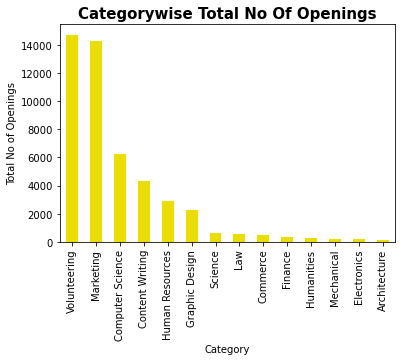

In [24]:
# Number of openings in each category

intern.groupby('Category')['Number of Openings'].sum().sort_values(ascending=False).plot(kind='bar',color='#EBDD00')
plt.xticks(rotation='vertical')
plt.xlabel('Category')
plt.ylabel('Total No of Openings')
plt.title('Categorywise Total No Of Openings', fontsize=15, fontweight='bold')
plt.show()

Maximum number of openings are in Volunteering, Marketing and Computer Science whereas the least number of openings are in Architecture, Electronics and Humanities.

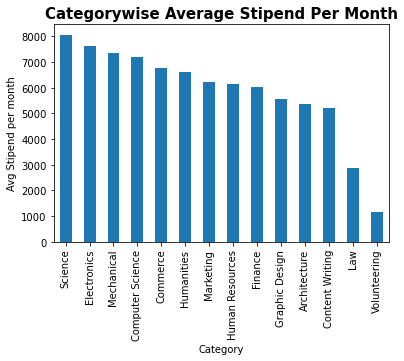

In [25]:
# Finding the average stipend per month for each category
intern.groupby('Category')['Stipend_per_month'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation='vertical')
plt.xlabel('Category')
plt.ylabel('Avg Stipend per month')
plt.title('Categorywise Average Stipend Per Month', fontsize=15, fontweight='bold')
plt.show()

Science Category Internships have the maxium average stipend whereas Volunteering category Internships have the minimum average stipend.

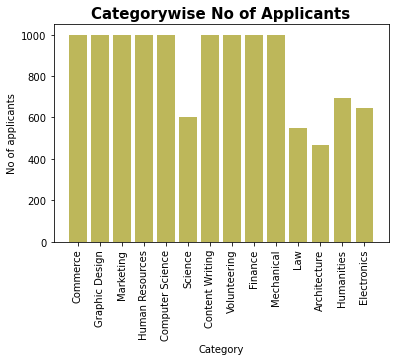

In [26]:
# Finding the number of applicants for each category
plt.bar(intern['Category'], intern['Applicants'],color='#BDB75A')
plt.xticks(rotation='vertical')
plt.xlabel('Category')
plt.ylabel('No of applicants')
plt.title('Categorywise No of Applicants', fontsize=15, fontweight='bold')
plt.show()

As seen above, Least no of applicants prefer doing 'Architecture' Internship whereas Internships like Mechanical, Finance, Volunteering, Content Writing, CS, HR, Marketing, Graphic Design and Commerce are higly popular among applicants and are preferred the most

#### Hence, it can be concluded that:<br>
<b>Science Internships offer Maximum Stipend/month yet they have the least applicants for it. Hence, they are very few Science internships floated and even the number of openings is very low.<br>
<b>Volunteering Internships offer the Least Stipend/month yet they have more than 1000 applicants for it. Hence, they are the fifth most floated internship and has the highest number of openings.<br>
<b>Law Internships offer very less stipend/month (Rs 2880.61) and might be probabaly the reason why there are very frew applicants for it. Hence, they are very few Law internships floated and even the number of openings is very low <br>
<b>Computer Science internships offer very good Stipend/month (Rs 7000-Rs 8000) and have more than 1000 applicants for it. Hence, they are the second most floated internships and have the third highest number of openings<br>
<b>Marketing internships offer a fairly decent Stipend/month (Rs 6000-Rs 7000) and have more than 1000 applicants for it. Hence, the maximum number of internships floated are of 'Marketing' category and have the second highest number of openings.

### Analysis of No of skills required and the Stipend offered

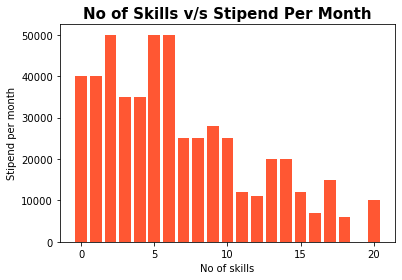

In [27]:
# Does no of skills required determine Stipend?
plt.bar(intern['No of Skills'], intern['Stipend_per_month'],color='#FF5733')
plt.xlabel('No of skills')
plt.ylabel('Stipend per month')
plt.title('No of Skills v/s Stipend Per Month', fontsize=15, fontweight='bold')
plt.show()

#### Hence, it can be concluded that the Stipend per month for any internship is not determined by the number of skills required for the internship.

### Analysis of Internships with Certificate

Text(0.5, 1.0, 'No of Internships with and without Certificate')

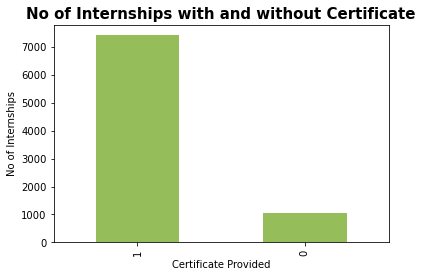

In [28]:
#Number of internships with certificate floated

intern['Certificate'].value_counts().plot(kind='bar',color="#95BD5A")
plt.xlabel('Certificate Provided')
plt.ylabel('No of Internships')
plt.title('No of Internships with and without Certificate', fontsize=15, fontweight='bold')

Maximum number of internships offered provide a certifcate

Text(0.5, 1.0, 'Avg Stipend for Internships with and without Certificate')

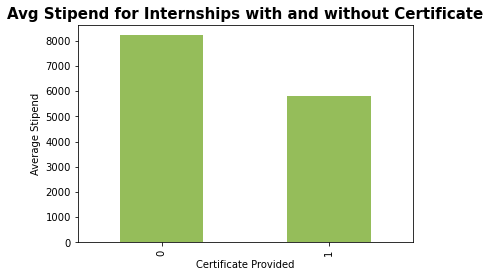

In [29]:
# Finding the average stipend per month for internships with and without certificate

intern.groupby('Certificate')['Stipend_per_month'].mean().plot(kind='bar',color="#95BD5A")
plt.xlabel('Certificate Provided')
plt.ylabel('Average Stipend')
plt.title('Avg Stipend for Internships with and without Certificate', fontsize=15, fontweight='bold')

The average stipend/month for internships without a certifcate is more than the internships with a certifiate

Text(0.5, 1.0, 'Avg No of Applicants for Internships with and without Certificate')

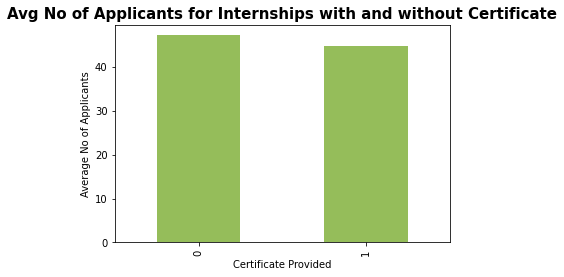

In [30]:
# Finding the average no of applicants for internships with and without certificate
intern.groupby('Certificate')['Applicants'].mean().plot(kind='bar',color="#95BD5A")
plt.xlabel('Certificate Provided')
plt.ylabel('Average No of Applicants')
plt.title('Avg No of Applicants for Internships with and without Certificate', fontsize=15, fontweight='bold')

There is not much difference between the number of applications for both types of internships- with certificate and without certificate

#### Hence, it can be concluded that although most internships floated provide a certifcate, applicants apply for both types of internships

### Analysis of Internships with Job offer 

Text(0.5, 1.0, 'Count of Internships with and without Job offer')

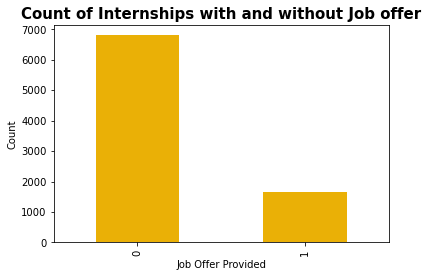

In [31]:
#Number of internships with potential job offer floated

intern['Job_Offer'].value_counts().plot(kind='bar', color='#EAB006')
plt.xlabel('Job Offer Provided')
plt.ylabel('Count')
plt.title('Count of Internships with and without Job offer', fontsize=15, fontweight='bold')

Most number of internships floated do not have a potential job offer.

Text(0.5, 1.0, 'Avg Stipend for Internships with and without Job offer')

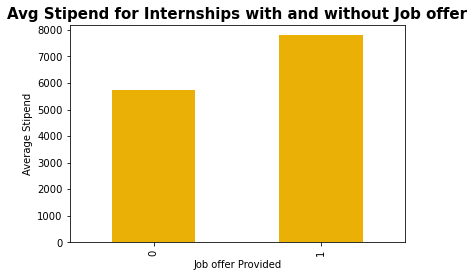

In [32]:
#Finding Avg Stipend for Internships with and without Job offer

intern.groupby('Job_Offer')['Stipend_per_month'].mean().plot(kind='bar',color='#EAB006')
plt.xlabel('Job offer Provided')
plt.ylabel('Average Stipend')
plt.title('Avg Stipend for Internships with and without Job offer', fontsize=15, fontweight='bold')

Internships with a potential job offer gives higher avg stipend per month than Internships without Job offer

Text(0.5, 1.0, 'Avg No of Applicants for Internships with and without Job Offer')

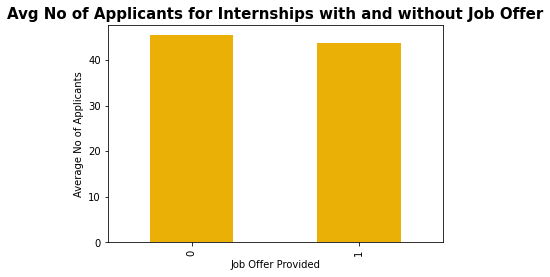

In [33]:
# Finding Avg No of Applicants for Internships with and without Job Offer
intern.groupby('Job_Offer')['Applicants'].mean().plot(kind='bar',color='#EAB006')
plt.xlabel('Job Offer Provided')
plt.ylabel('Average No of Applicants')
plt.title('Avg No of Applicants for Internships with and without Job Offer', fontsize=15, fontweight='bold')

Almost the same number of applicants prefer Internships with job offer and Internships without job offer

#### Hence, we can conclude that despite the fact that internships with potential job offers give higher stipend/month, applicants prefer both types on internship- with and without job offer. This might be the reason why most number of internships floated do not have a potential job offer.

### Analysis of Internships of Work From Home type

Text(0.5, 1.0, 'Count of Internships with and without Work From Home Facility')

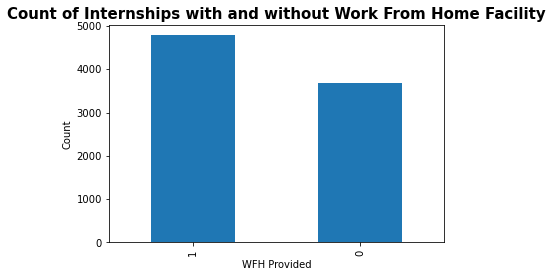

In [34]:
# Number of work from home internships offered

intern['WFH'].value_counts().plot(kind='bar').plot(kind='bar')
plt.xlabel('WFH Provided')
plt.ylabel('Count')
plt.title('Count of Internships with and without Work From Home Facility', fontsize=15, fontweight='bold')

Maximum Internships offered are of type 'Work from Home'

Text(0.5, 1.0, 'Avg Stipend for Internships with and without WFH')

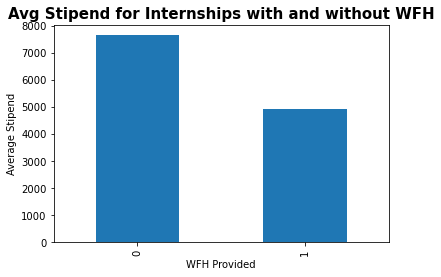

In [35]:
# Finding Avg Stipend for Internships with and without Work from home

intern.groupby('WFH')['Stipend_per_month'].mean().plot(kind='bar')
plt.xlabel('WFH Provided')
plt.ylabel('Average Stipend')
plt.title('Avg Stipend for Internships with and without WFH', fontsize=15, fontweight='bold')

'Work from home' Internships gives lower avg stipend per month than other Internships

Text(0.5, 1.0, 'Avg No of Applicants for Internships with and without WFH')

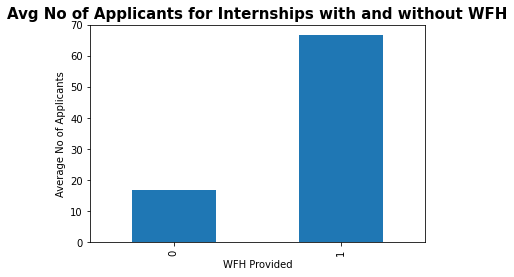

In [36]:
# Finding Avg no of Applicants for Internships with and without Work from home
intern.groupby('WFH')['Applicants'].mean().plot(kind='bar')
plt.xlabel('WFH Provided')
plt.ylabel('Average No of Applicants')
plt.title('Avg No of Applicants for Internships with and without WFH', fontsize=15, fontweight='bold')

'Work from home' Internships are preferred more by applicants than other internships

#### Hence, we can conclude that although 'Work from Home' internships offer lower stipend/month than others, most applicants prefer to apply for 'Work from Home' type internships. This might be the reason why more number of work from home internships are floated.

### Analysis of Internships based on its Duration

Text(0.5, 1.0, 'Count of Internships for each Duration')

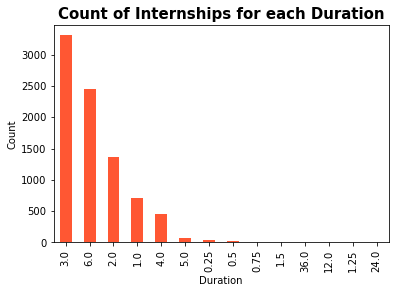

In [37]:
# Finding Count of Internships for each Duration

intern['Duration'].value_counts().plot(kind='bar',color='#FF5733')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.title('Count of Internships for each Duration', fontsize=15, fontweight='bold')

Maximum Internships offered are of duration 3 months whereas the least number of Internships offered are of duration 1.25 months and 24 months.

Text(0.5, 1.0, 'Avg Stipend for Internships for each duration')

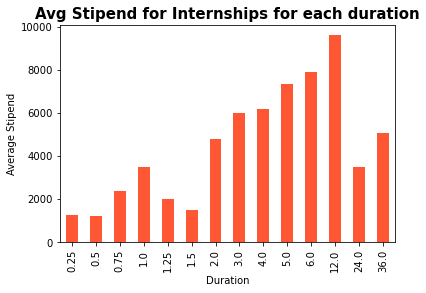

In [38]:
# Finding Avg Stipend for Internships for each duration

intern.groupby('Duration')['Stipend_per_month'].mean().plot(kind='bar',color='#FF5733')
plt.xlabel('Duration')
plt.ylabel('Average Stipend')
plt.title('Avg Stipend for Internships for each duration', fontsize=15, fontweight='bold')

Maximum Avg Stipend is offered in Internships of duration 12 months whereas the Minimum Avg Stipend is offered in Internships of duration 0.25 months<br>
It can also be said that roughly the Avg Stipend increases as the duration of the Internship inreases.

Text(0.5, 1.0, 'Avg No of Applicants for Internships for each Duration')

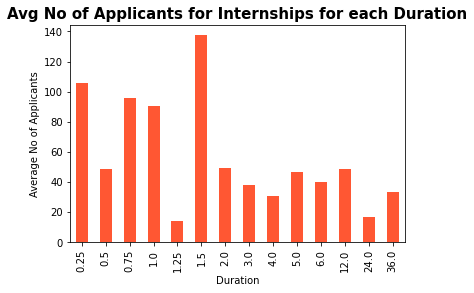

In [39]:
# Finding Avg No of Applicants for Internships for each Duration
intern.groupby('Duration')['Applicants'].mean().plot(kind='bar',color='#FF5733')
plt.xlabel('Duration')
plt.ylabel('Average No of Applicants')
plt.title('Avg No of Applicants for Internships for each Duration', fontsize=15, fontweight='bold')

Maximum Applicants prefer Internships with duration of 1.5 months and very few Applicants prefer Internships with duration of 24 months and more

#### Hence, it can be concluded that most applicants prefer internships with lesser duration even if some of them give lower stipend/month. Hence, the number of internships floated for a duration of less than 3 months is more than rest.<br>There are very few applicants who prefer internships with duration of 12 months even if it gives the highest avg stipend/month. Hence, the number of internships floated for a duration of more than 12 months is the least.

### Analysis of Locationwise Internships

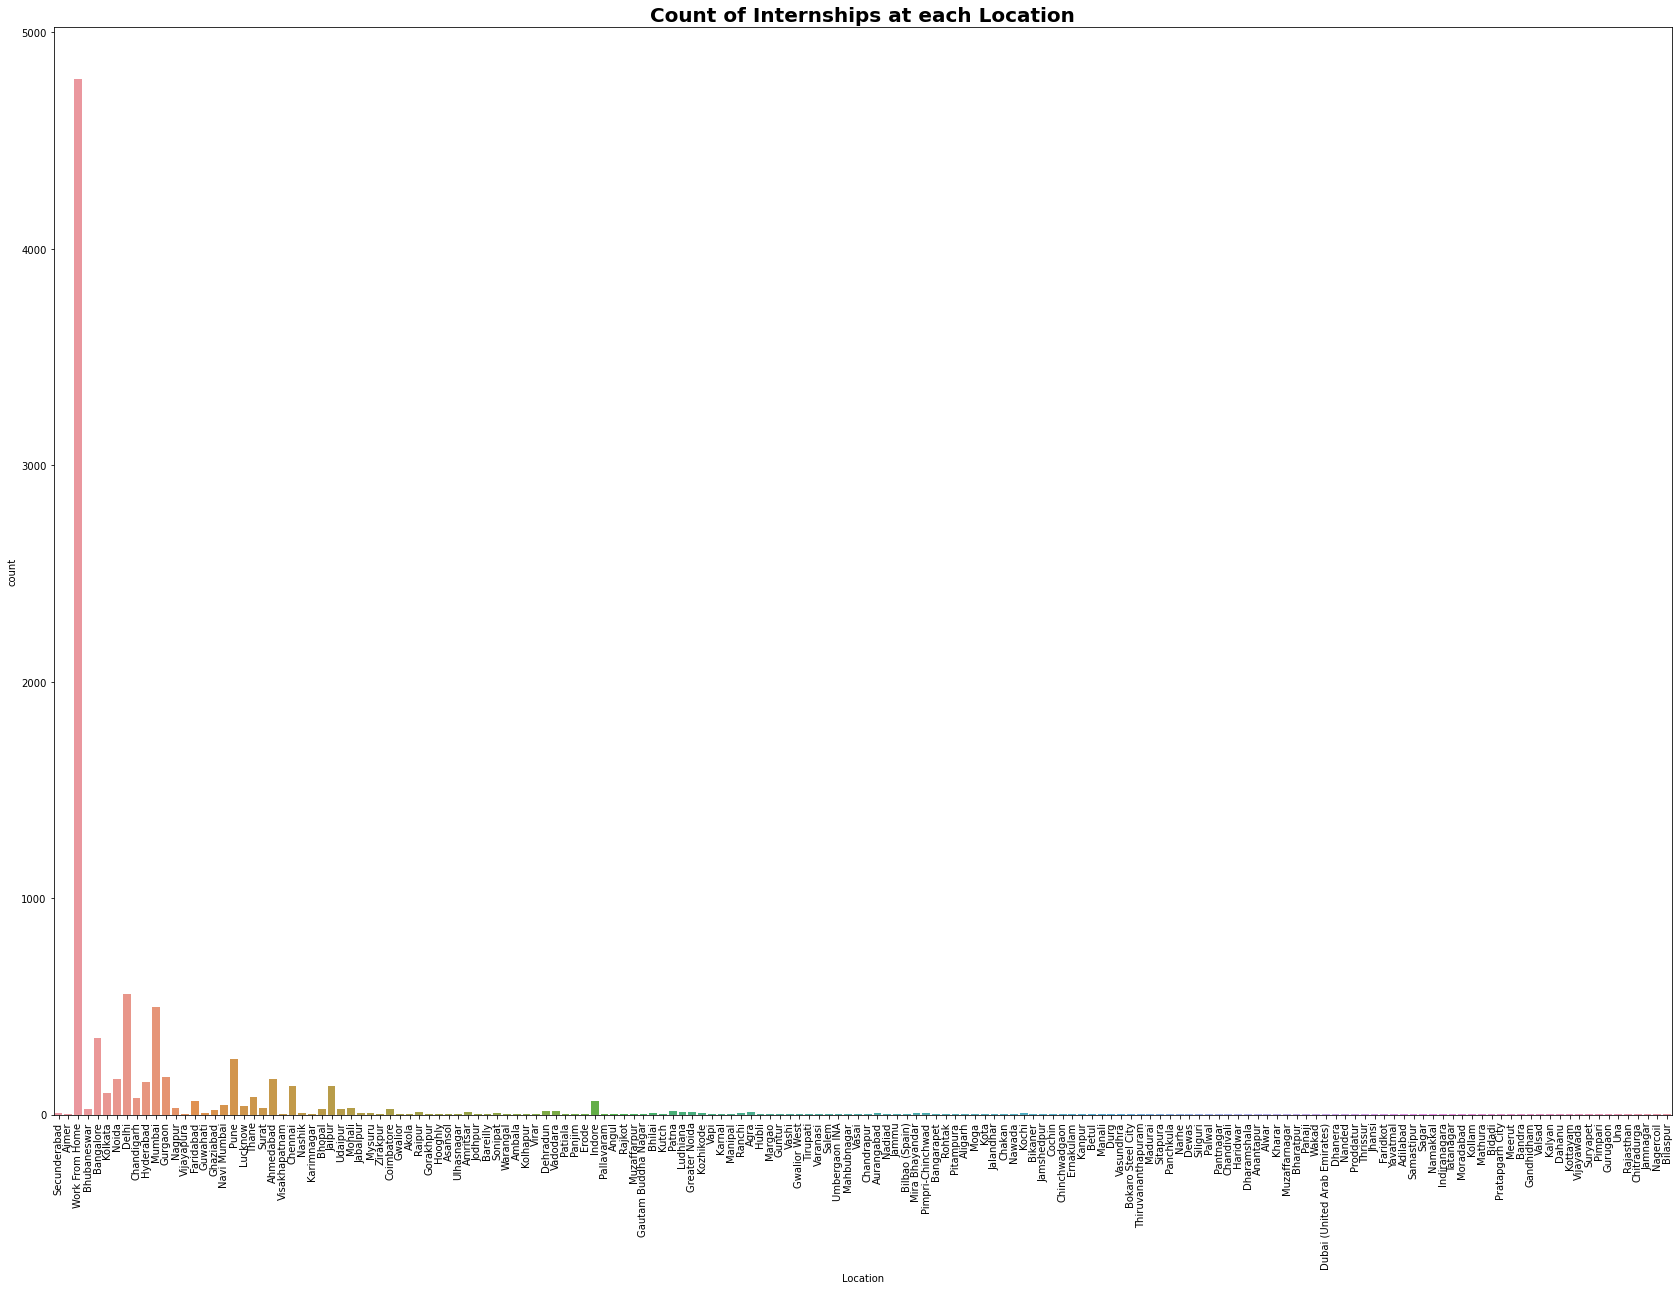

In [40]:
# Countplot of location

plt.figure(figsize=(29,20))
sns.countplot(x='Location', data=intern)
plt.title('Count of Internships at each Location', fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

#### Maximum number of internships offered are 'Work from Home'<br> But considering only cities, Delhi, Bangalore, Mumbai and Pune have the maximum Internship opportunities.

In [41]:
# Average stipend at each loaction
intern.groupby('Location')['Stipend_per_month'].mean().sort_values(ascending=False)

Location
Bharatpur         30000.0
Gurugaon          20000.0
Jamnagar          20000.0
Kottayam          20000.0
Manipal           20000.0
                   ...   
Bareilly           2000.0
Pimpari            2000.0
Haridwar           2000.0
Dahanu              500.0
Bilbao (Spain)      300.0
Name: Stipend_per_month, Length: 166, dtype: float64

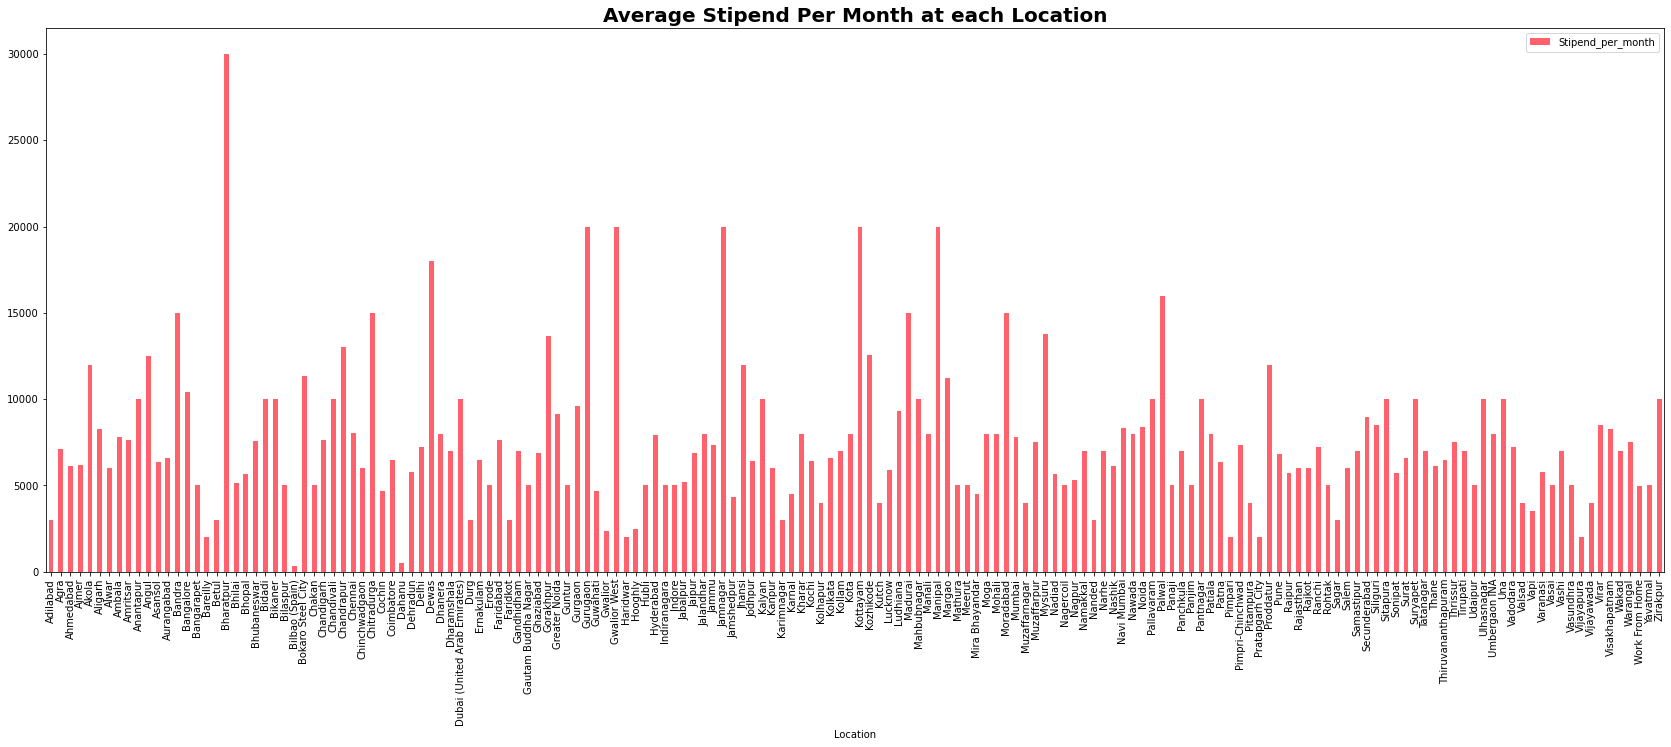

In [42]:
# Average stipend at each loaction

a = intern.groupby('Location').agg({'Stipend_per_month':'mean'})

plt.rcParams["figure.figsize"] = (29,10)
a.plot(kind='bar', color='#FF616D')
plt.title('Average Stipend Per Month at each Location', fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.show()

#### The Top 5 Internship locations in terms of average stipend/month is Bharatpur, Gurugaon, Jamnagar, Kottayam and Manipal<br> The Bottome 5 Internship locations in terms of average stipend/month is Bilbao, Dahanu, Haridwar, Pimpari and Bareilly.<br>This shows that average stipend also varies with Internship location 

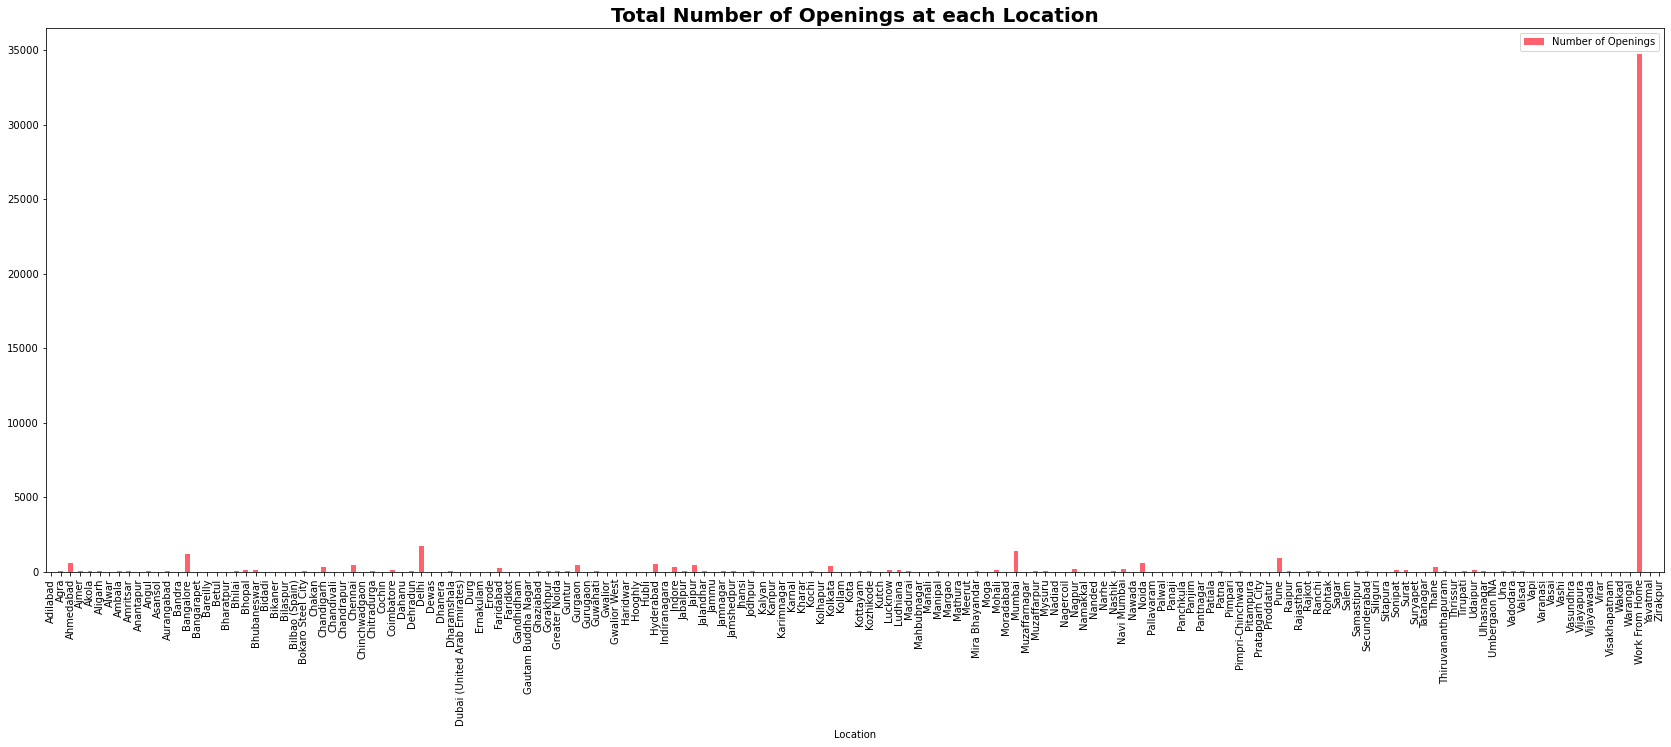

In [43]:
#Number of openings in each location

a = intern.groupby('Location').agg({'Number of Openings':'sum'})

plt.rcParams["figure.figsize"] = (29,10)
a.plot(kind='bar', color='#FF616D')
plt.title('Total Number of Openings at each Location', fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.show()

#### There is a huge requirement of interns for Work From Home type Internships. Delhi, Mumbai, Bangalore and Pune are among the top cities having huge requirements (on the basis of number of openings)

### Analysis of Stipends

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


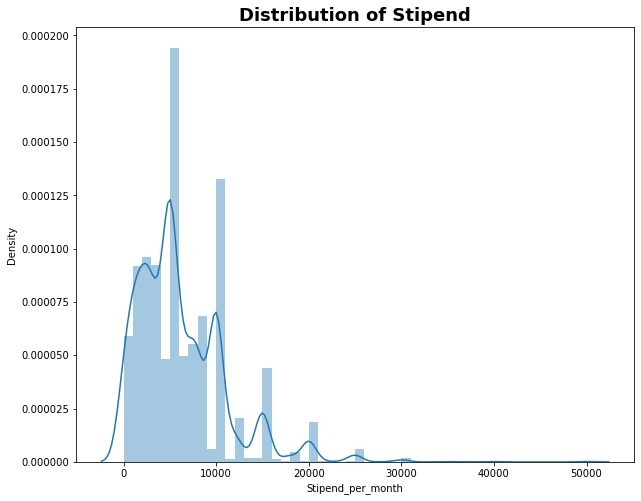

In [44]:
# Density plot to visualize stipend

plt.figure(figsize = (10, 8))
sns.distplot(intern['Stipend_per_month'])
plt.title("Distribution of Stipend", fontsize=18, fontweight='bold')
plt.show()

#### The density curve is right skewed which shows that the mean is greater than the median. <br>Maximum internships have stipend between Rs 0 and 10,000. There are very few internships with stipend more than Rs 20,000

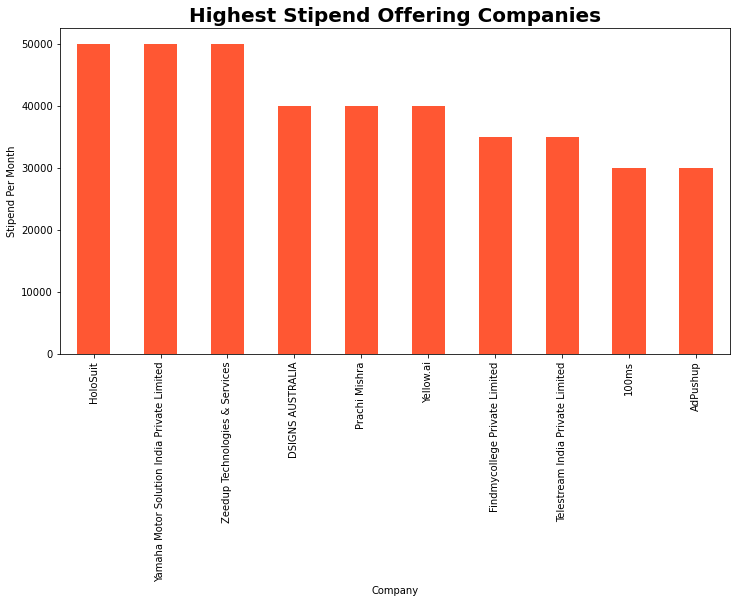

In [45]:
# 10 Highest Stipend Offering Companies

plt.figure(figsize=(12,6))
intern.groupby('Company')['Stipend_per_month'].max().nlargest(10).plot.bar(color='#FF5733')
plt.title('Highest Stipend Offering Companies', fontsize=20, fontweight='bold')
plt.ylabel('Stipend Per Month')
plt.xticks(rotation=90)
plt.show()

#### HoloSuit, Yamaha Motor Solution Pvt Ltd, Zeedup technologies and Dsigns Australia are among the top companies offering the highest stipend per month

### Analysis of Internships under Computer Science Category

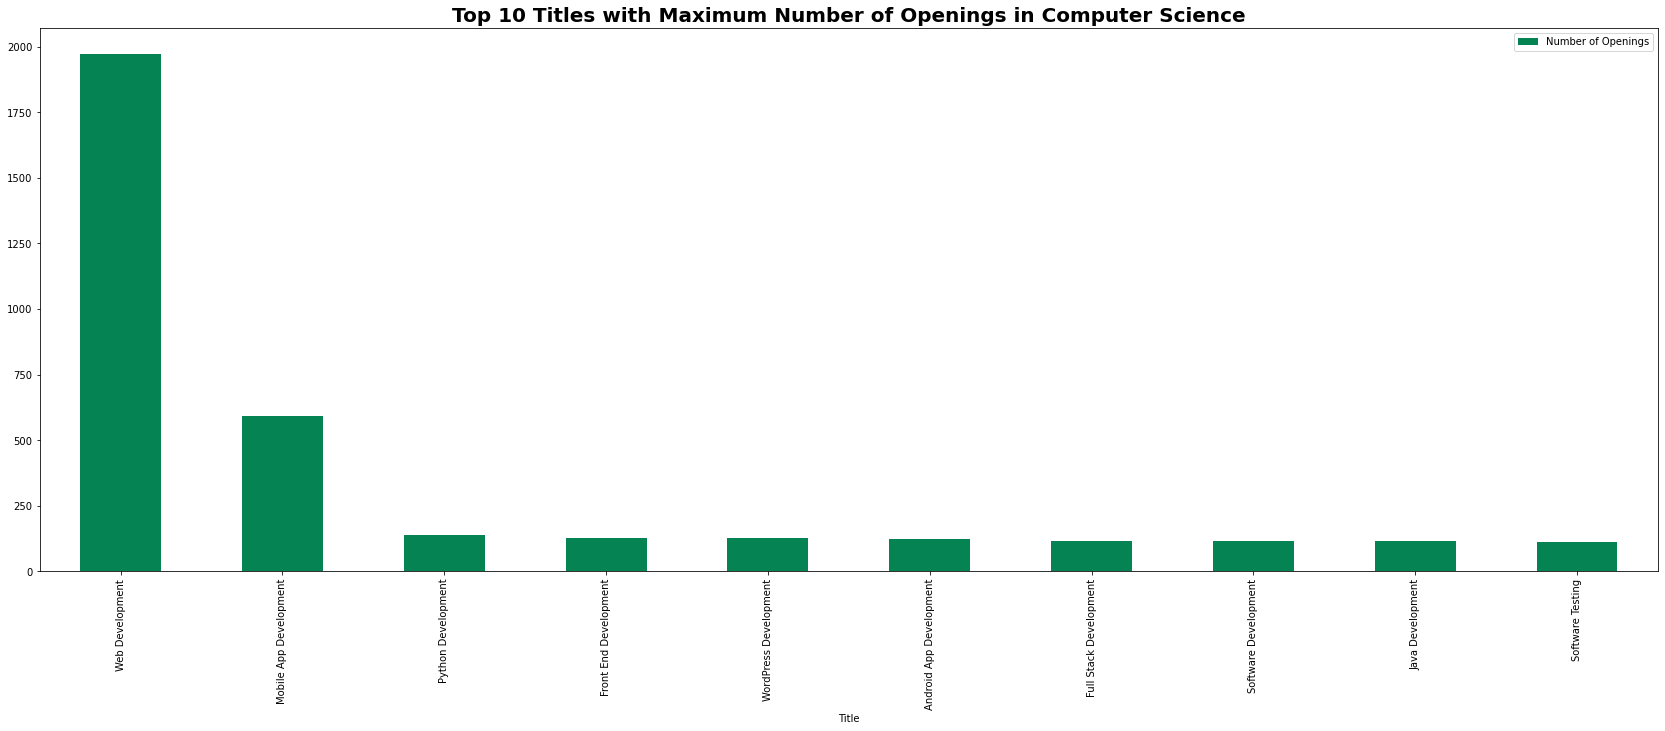

In [46]:
# Top 10 titles under Computer Science Category which has the maximum number of openings
intern_CS = intern[intern.Category.eq('Computer Science')]

CS_opening = pd.DataFrame(intern_CS.groupby('Title')['Number of Openings'].sum().sort_values(ascending=False))
CS_opening.head(10).plot(kind='bar', color='#068353')
plt.title('Top 10 Titles with Maximum Number of Openings in Computer Science', fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.show()

#### The highest requirement of interns (based on number of openings) in the Computer Science Category is for Web Development, Mobile App Development, Python Development, Front End Development and WordPress Development. 

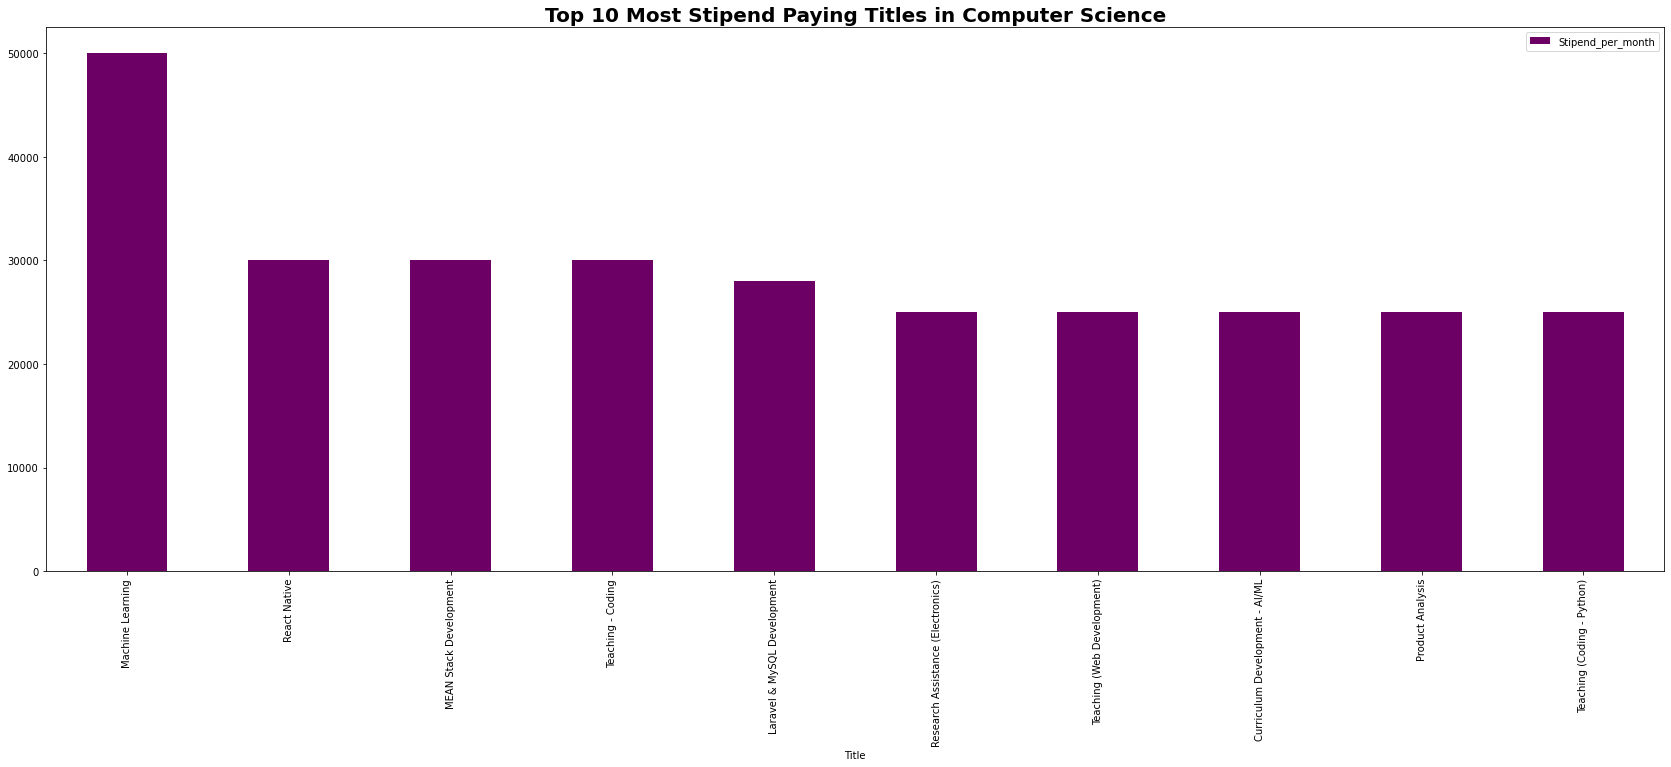

In [47]:
# Top 10 Most Stipend Paying Titles in Computer Science

CS_stipend = pd.DataFrame(intern_CS.groupby('Title')['Stipend_per_month'].mean().sort_values(ascending=False))
CS_stipend.head(10).plot(kind='bar', color='#6C0065')
plt.title('Top 10 Most Stipend Paying Titles in Computer Science', fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.show()

#### Machine Learning, React Native and Mean Stack Development are among the the Highest Stipend Paying Titles in Computer Science category of Internships

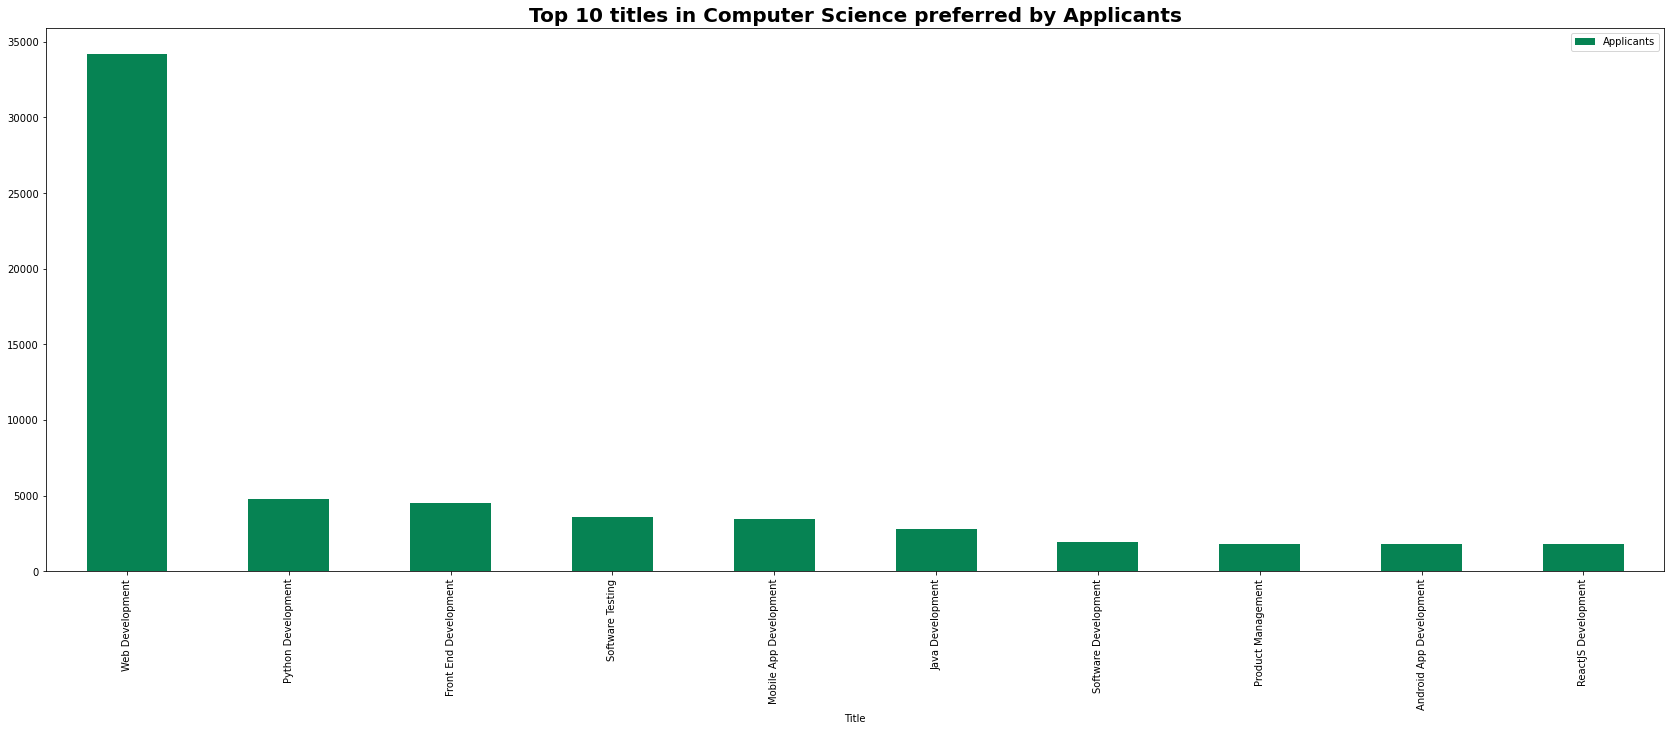

In [48]:
CS_applicants = pd.DataFrame(intern_CS.groupby('Title')['Applicants'].sum().sort_values(ascending=False))
CS_applicants.head(10).plot(kind='bar', color='#068353')
plt.title('Top 10 titles in Computer Science preferred by Applicants', fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.show()

#### Web development, Python Development, Front End Development, Software Testing and Mobile App Development are among the most preferred job titles by applicants

#### Hence, it can be concluded that titles like Web development, Python Development and Mobile App Development in Computer Science category have huge requirements and most applicants prefer to apply for it.

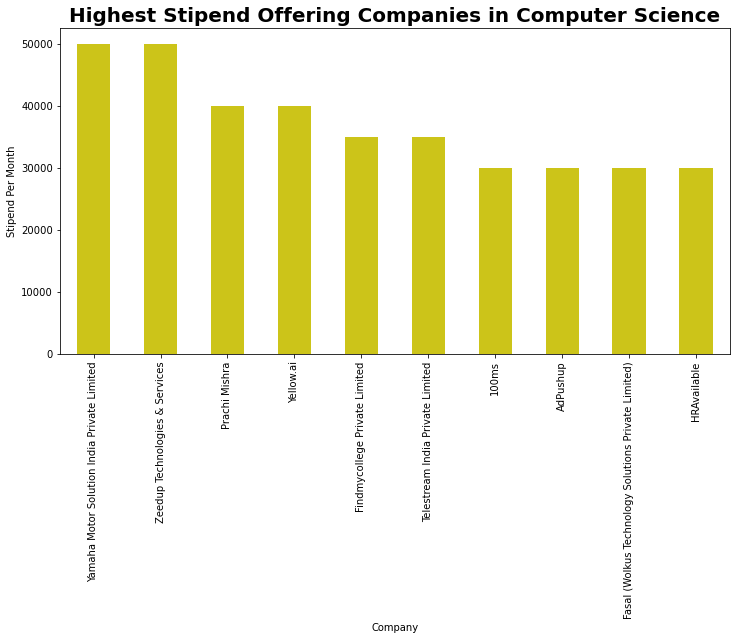

In [49]:
# Highest Stipend Paying Companies in Computer Science category

plt.figure(figsize=(12,6))
intern_CS.groupby('Company')['Stipend_per_month'].max().nlargest(10).plot.bar(color='#CCC419')
plt.title('Highest Stipend Offering Companies in Computer Science', fontsize=20, fontweight='bold')
plt.ylabel('Stipend Per Month')
plt.xticks(rotation=90)
plt.show()

#### Some of the highest stipend paying companies in Computer science Category are Yamaha Motor Solution, Zeedup Technologies, Prachi Mishra, Yellow.ai and Findmycollege

### Analysis of Internships with Perks and Incentives

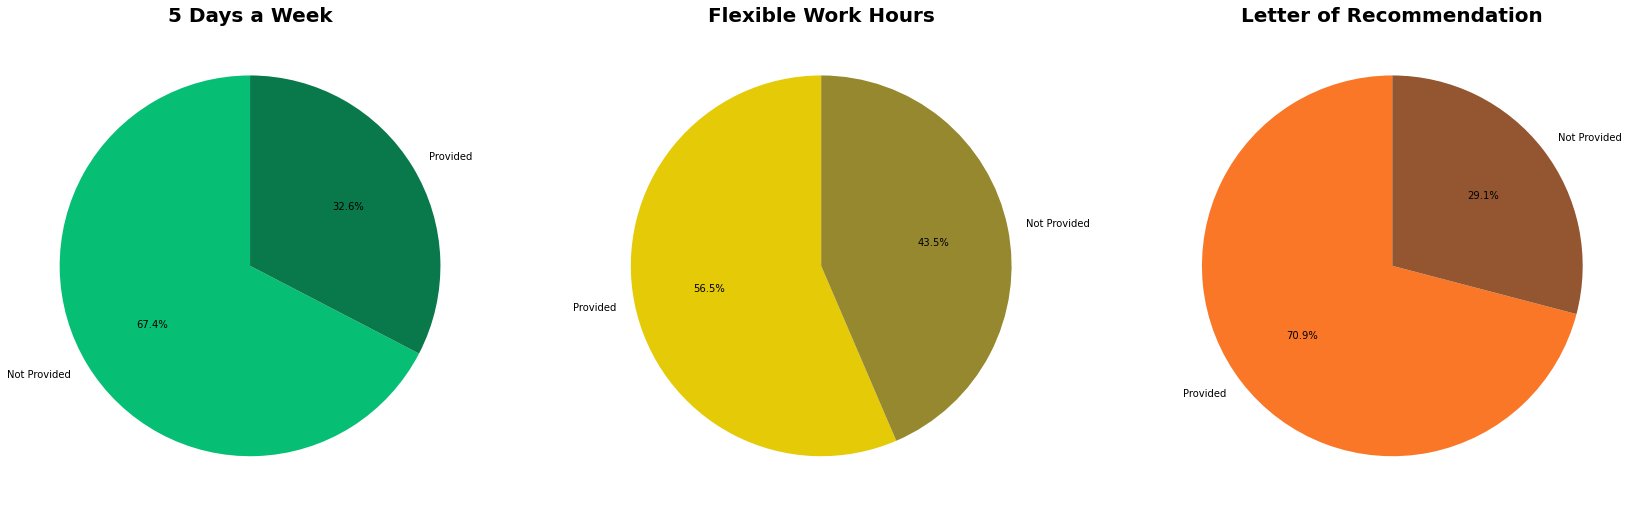

In [50]:
# Internships with 5 days a week
# Internships with Flexible work hours
# Internships with LOR
label1 = ['Not Provided','Provided']
label2 = ['Provided', "Not Provided"]
label3 = ['Provided','Not Provided']

intern_5days = intern['5_Days'].value_counts().values
intern_flexible = intern['Flexible_work_hrs'].value_counts().values
intern_lor = intern['LOR'].value_counts().values

fig, ax1 = plt.subplots(nrows=1, ncols=3)

color1 = ['#07BF74', '#09784B']
color2 = ['#E5CA07', '#95882E']
color3 = ['#F97727', '#935630']

ax1[0].pie(intern_5days, labels=label1, autopct='%1.1f%%', startangle=90, colors=color1)
ax1[0].set_title('5 Days a Week', fontsize=20, fontweight='bold')

ax1[1].pie(intern_flexible, labels=label2, autopct='%1.1f%%', startangle=90, colors=color2)
ax1[1].set_title('Flexible Work Hours', fontsize=20, fontweight='bold')

ax1[2].pie(intern_lor, labels=label3, autopct='%1.1f%%', startangle=90, colors=color3)
ax1[2].set_title('Letter of Recommendation', fontsize=20, fontweight='bold')
plt.show()

#### 52.6% Internships provide 5 days a week<br>56.5% Internships provide Flexible Work Hours<br>70.9% Internships provide Letter of Recommendation

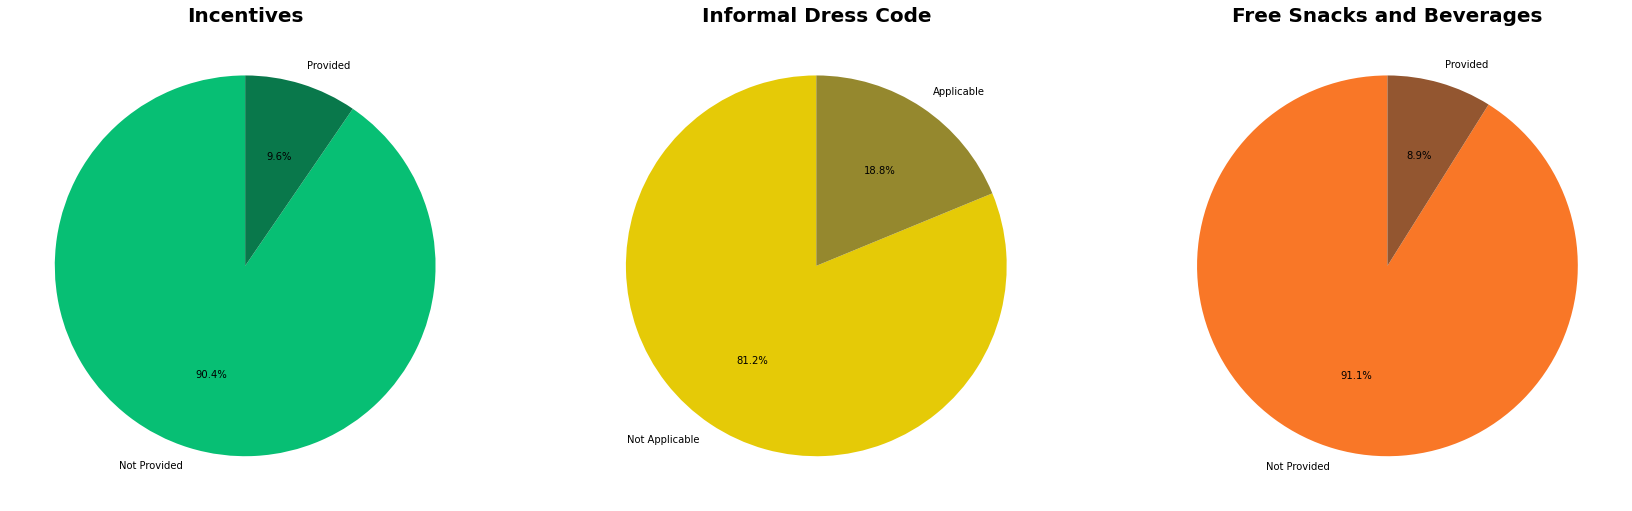

In [51]:
# Internships with Incentives
# Internships with Informal Dress Code
# Internships with Free Snacks and Beverges
label1 = ['Not Provided','Provided']
label2 = ['Not Applicable', 'Applicable']
label3 = ['Not Provided','Provided']

intern_inc = intern['Incentives'].value_counts().values
intern_dress = intern['Informal_Dress_Code'].value_counts().values
intern_snacks = intern['Free_Snacks'].value_counts().values

fig, ax1 = plt.subplots(nrows=1, ncols=3)

color1 = ['#07BF74', '#09784B']
color2 = ['#E5CA07', '#95882E']
color3 = ['#F97727', '#935630']

ax1[0].pie(intern_inc, labels=label1, autopct='%1.1f%%', startangle=90, colors=color1)
ax1[0].set_title('Incentives', fontsize=20, fontweight='bold')

ax1[1].pie(intern_dress, labels=label2, autopct='%1.1f%%', startangle=90, colors=color2)
ax1[1].set_title('Informal Dress Code', fontsize=20, fontweight='bold')

ax1[2].pie(intern_snacks, labels=label3, autopct='%1.1f%%', startangle=90, colors=color3)
ax1[2].set_title('Free Snacks and Beverages', fontsize=20, fontweight='bold')
plt.show()

#### Only 9.6% Internships provide Incentives<br>18.8% Internships allow Informal Dress Code<br>8.9% Internships provide Free Snacks and Bevarages

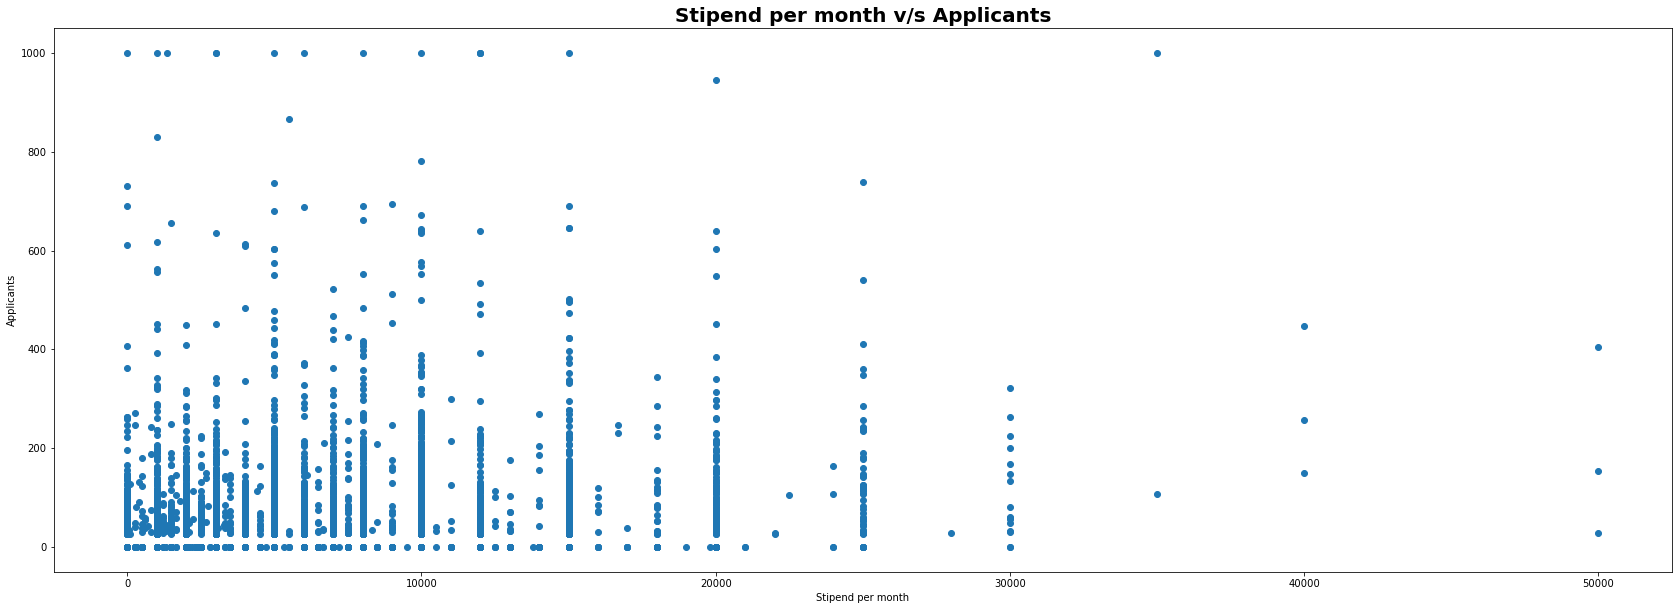

In [52]:
# Scatter plot of stipend and applicants

plt.scatter(intern['Stipend_per_month'], intern['Applicants'])
plt.xlabel('Stipend per month')
plt.ylabel('Applicants')
plt.title('Stipend per month v/s Applicants',fontsize=20, fontweight='bold')
plt.show()

#### There is no relation between stipend and the number of applicants. <br>Also, it can be observed that there are some outliers in the data